In [64]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
from matplotlib.widgets import SpanSelector
import math
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

def read_sensor_txt(path, sep=";"):
    t_iso = np.genfromtxt(path, delimiter=sep, skip_header=1, usecols=0, dtype=str)[::-1]
    data = np.genfromtxt(path, delimiter=sep, skip_header=1, usecols=(1,2,3), dtype=float)

    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]

    return t_iso, x, y, z

def iso_to_seconds(t_iso):
        dt = np.array([datetime.fromisoformat(str(s)) for s in t_iso])
        t0 = dt[0]
        t_sec = np.array([(d-t0).total_seconds() for d in dt], dtype=float)
        return t_sec

def draw_plot_from_file(file, header):
    t_iso, x, y, z = read_sensor_txt(file)
    t_sec = iso_to_seconds(t_iso)
    draw_plot_from_data(t_iso,x,y,z,header)

def draw_plot_from_data(t, arrX, arrY, arrZ, header):
    plt.figure(figsize=(15, 3))
    
    plt.plot(t, arrX, label='Oś X', linewidth=1.5, alpha=0.8)
    plt.plot(t, arrY, label='Oś Y', linewidth=1.5, alpha=0.8)
    plt.plot(t, arrZ, label='Oś Z', linewidth=1.5, alpha=0.8)

    plt.title(header)
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def draw_single_plot_from_data(arrX, arrY, header, axisLabel):
    plt.figure(figsize=(15, 3))
    
    plt.plot(arrX, arrY, label=axisLabel, linewidth=1.5, alpha=0.8)

    plt.title(header)
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

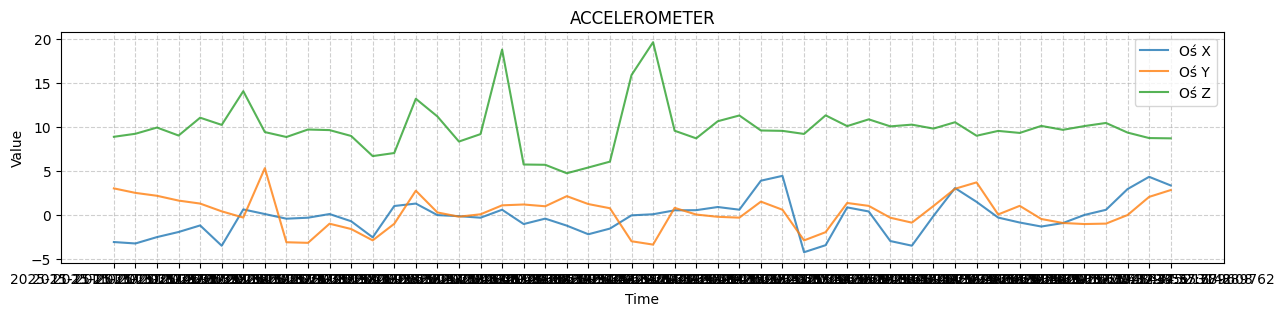

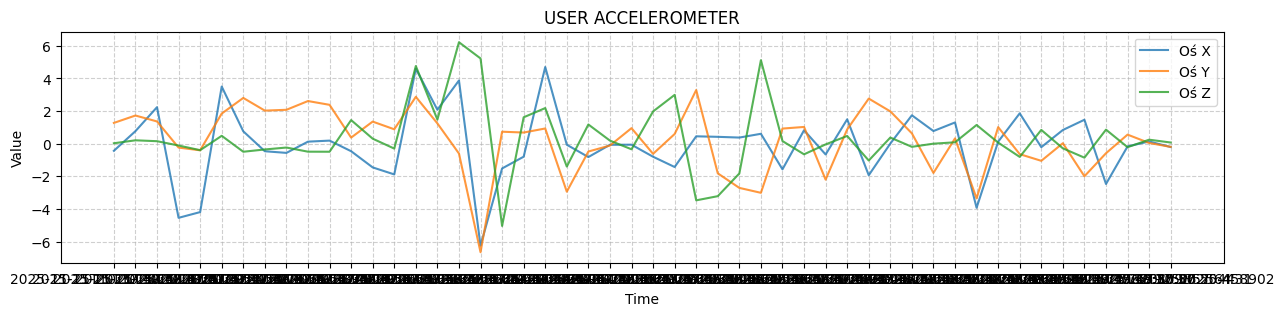

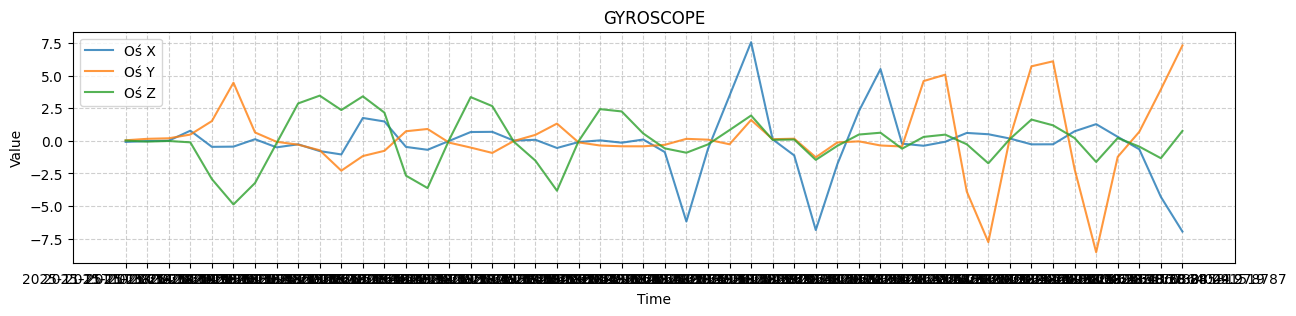

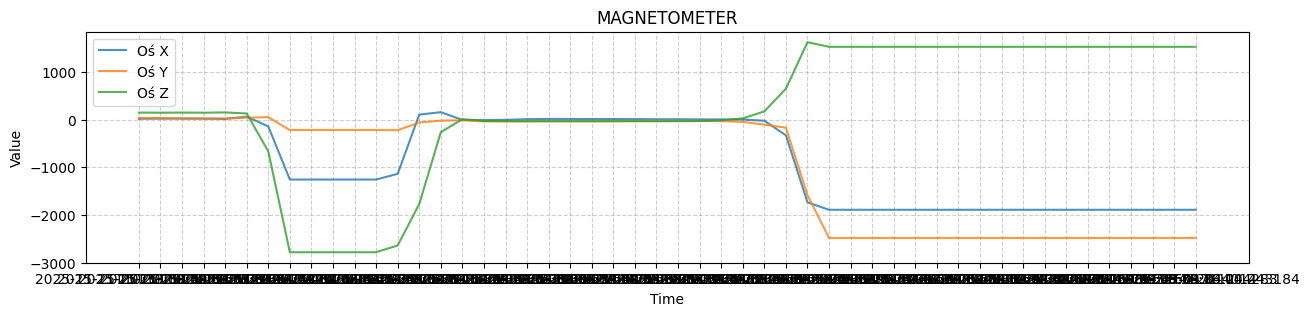

In [65]:
#ZADANIE 1
draw_plot_from_file("accel.txt", "ACCELEROMETER")
draw_plot_from_file("uaccel.txt", "USER ACCELEROMETER")
draw_plot_from_file("gyro.txt", "GYROSCOPE")
draw_plot_from_file("magnetometer.txt", "MAGNETOMETER")


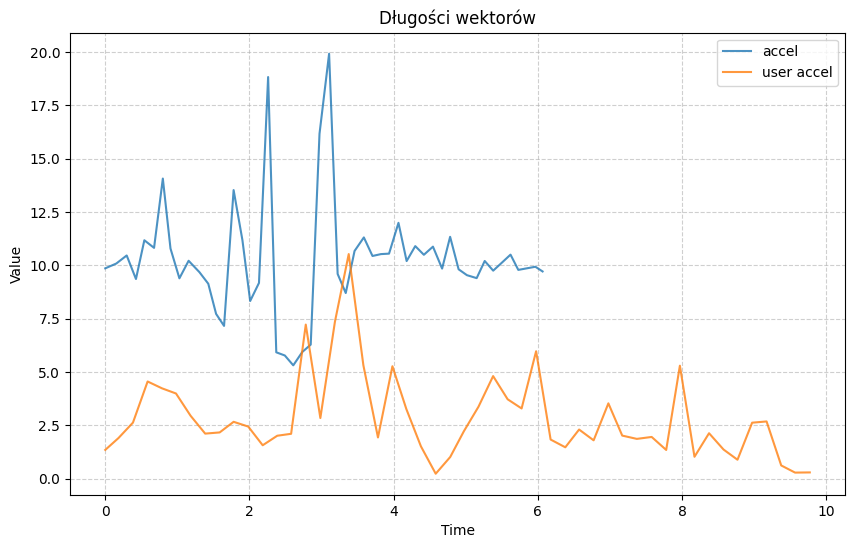

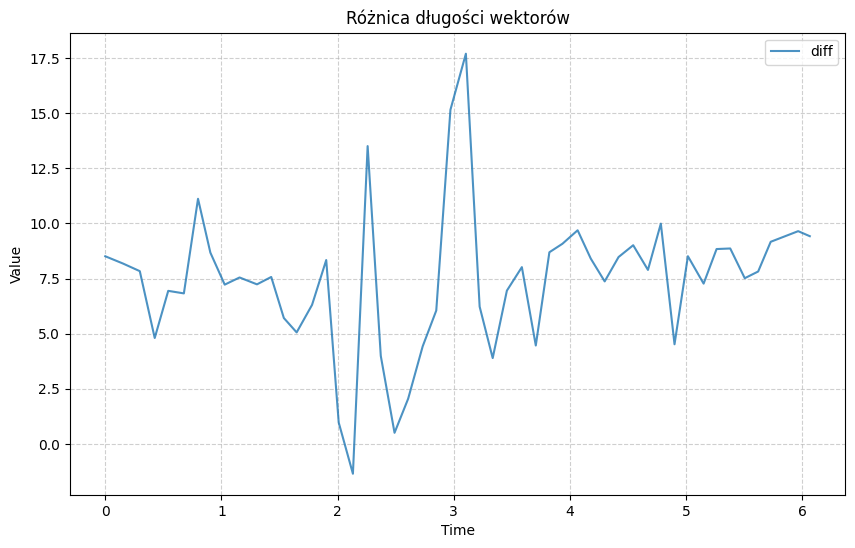

In [66]:
#ZADANIE 2 A
t_iso_a, x_a, y_a, z_a = read_sensor_txt("accel.txt")
t_sec_a = iso_to_seconds(t_iso_a)
magnitude_a = np.sqrt(x_a**2 + y_a**2 + z_a**2)

t_iso_b, x_b, y_b, z_b = read_sensor_txt("uaccel.txt")
t_sec_b = iso_to_seconds(t_iso_b)
magnitude_b = np.sqrt(x_b**2 + y_b**2 + z_b**2)

magnitude_c = magnitude_a - magnitude_b

#Plot A
plt.figure(figsize=(10, 6))

plt.plot(t_sec_a, magnitude_a, label='accel', linewidth=1.5, alpha=0.8)
plt.plot(t_sec_b, magnitude_b, label='user accel', linewidth=1.5, alpha=0.8)

plt.title("Długości wektorów")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Plot B
plt.figure(figsize=(10, 6))

plt.plot(t_sec_a, magnitude_c, label='diff', linewidth=1.5, alpha=0.8)

plt.title("Różnica długości wektorów")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Średnie żyroskopu: x-0.1516 y0.24632 z0.04163999999999999
Średnie magnetometru: x-864.6191 y-962.7954599999999 z223.16502
Odchylenia standardowe żyroskopu: x2.3691014054674304 y2.7781847725095754 z1.8818867839897018
Odchylenia standardowe magnetometru: x896.7106671425487 y1172.165392116575 z1369.8204024135082
Wariancje żyroskopu: x5.612641469387755 y7.718310630204082 z3.541497867755102
Wariancje magnetometru: x804090.0205672347 y1373971.7064758043 z1876407.934868306
Średnie odchylenia: żyroskop:2.3430576539889025 | magnetometer: 1146.2321538908773
Magnetometer jest bardziej zaszumiony (przyłożyłem telefon do bardzo silnego magnesu)
Dla magnetometru osią z największym rozrzutem jest oś Z
Dla żyroskopu osią z największym rozrzutem jest oś Y


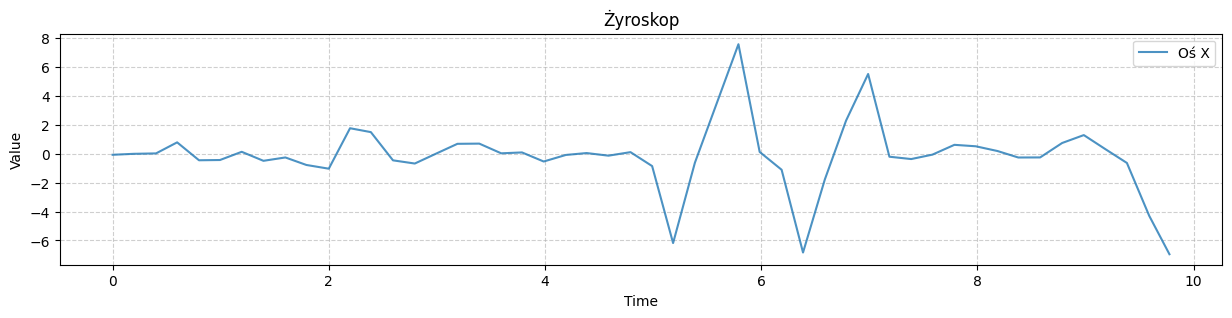

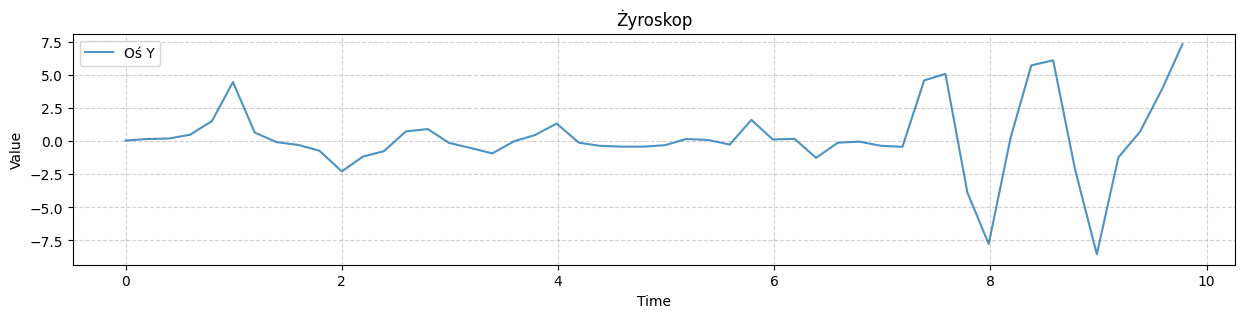

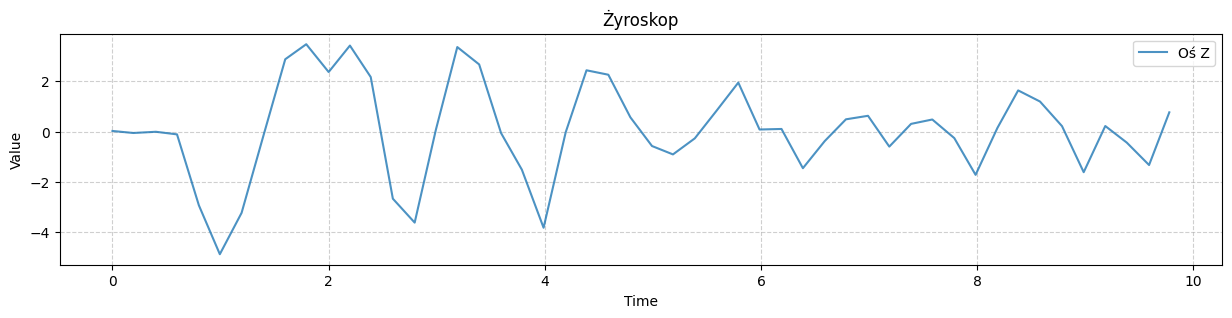

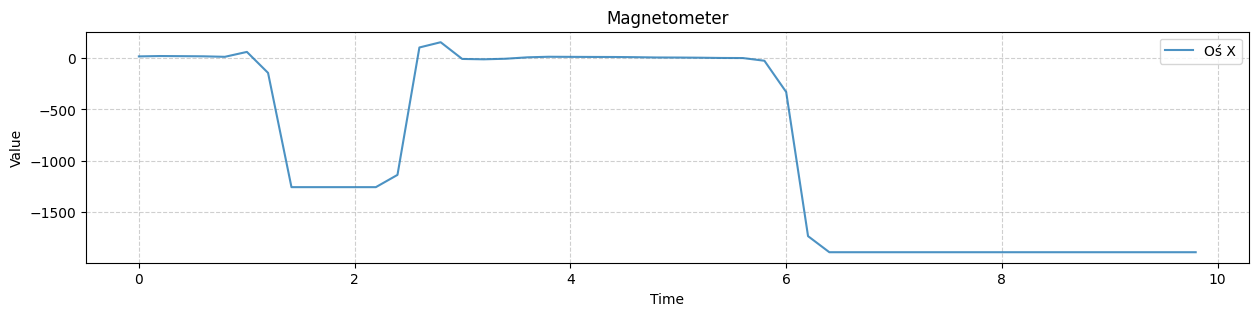

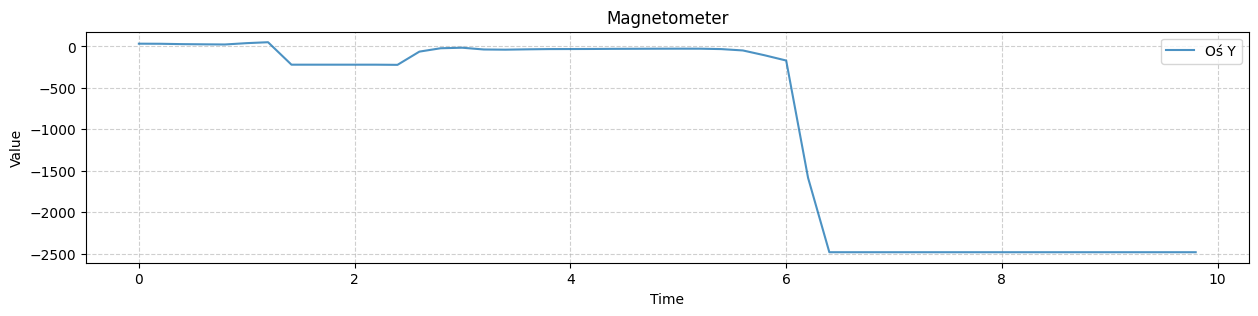

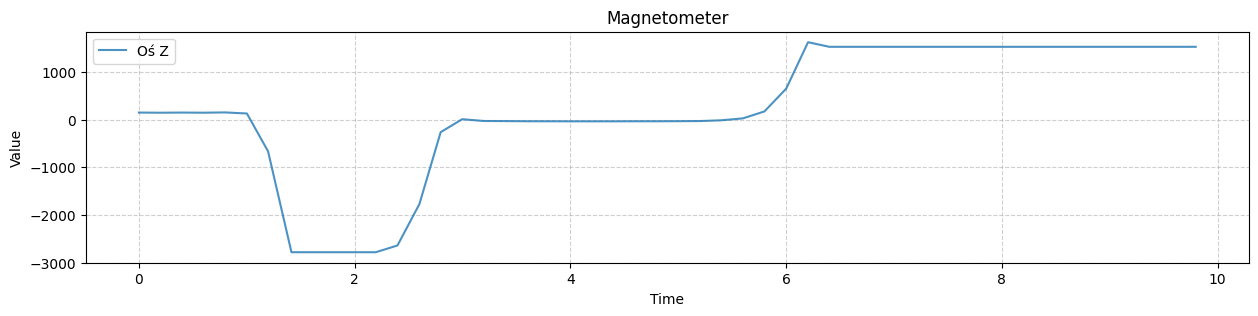

In [67]:
#Zadanie 3
def getVals(data):
    return statistics.mean(data),statistics.stdev(data), statistics.variance(data)

t_g, x_g, y_g, z_g = read_sensor_txt("gyro.txt")
t_g = iso_to_seconds(t_g)
mean_g_x, stdev_g_x, variance_g_x = getVals(x_g)
mean_g_y, stdev_g_y, variance_g_y = getVals(y_g)
mean_g_z, stdev_g_z, variance_g_z = getVals(z_g)

t_m, x_m, y_m, z_m = read_sensor_txt("magnetometer.txt")
t_m = iso_to_seconds(t_m)

mean_m_x, stdev_m_x, variance_m_x = getVals(x_m)
mean_m_y, stdev_m_y, variance_m_y = getVals(y_m)
mean_m_z, stdev_m_z, variance_m_z = getVals(z_m)

print(f"Średnie żyroskopu: x{mean_g_x} y{mean_g_y} z{mean_g_z}")
print(f"Średnie magnetometru: x{mean_m_x} y{mean_m_y} z{mean_m_z}")

print(f"Odchylenia standardowe żyroskopu: x{stdev_g_x} y{stdev_g_y} z{stdev_g_z}")
print(f"Odchylenia standardowe magnetometru: x{stdev_m_x} y{stdev_m_y} z{stdev_m_z}")

print(f"Wariancje żyroskopu: x{variance_g_x} y{variance_g_y} z{variance_g_z}")
print(f"Wariancje magnetometru: x{variance_m_x} y{variance_m_y} z{variance_m_z}")

noise_g = (stdev_g_x + stdev_g_y + stdev_g_z)/3
noise_m = (stdev_m_x + stdev_m_y + stdev_m_z)/3
print(f"Średnie odchylenia: żyroskop:{noise_g} | magnetometer: {noise_m}")

if(noise_g>noise_m): 
    print("Żyroskop jest bardziej zaszumiony")
elif(noise_g<noise_m):
    print("Magnetometer jest bardziej zaszumiony (przyłożyłem telefon do bardzo silnego magnesu)")
else:
    print("Oba sensory są identycznie zaszumione")

if (stdev_m_x > stdev_m_y and stdev_m_x > stdev_m_z):
    print("Dla magnetometru osią z największym rozrzutem jest oś X")
elif (stdev_m_y > stdev_m_x and stdev_m_y > stdev_m_z):
    print("Dla magnetometru osią z największym rozrzutem jest oś Y")
elif (stdev_m_z > stdev_m_x and stdev_m_z > stdev_m_y):
    print("Dla magnetometru osią z największym rozrzutem jest oś Z")
else:
    print("Dla magnetometru wszystkie osie mają porównywalny rozrzut")

if (stdev_g_x > stdev_g_y and stdev_g_x > stdev_g_z):
    print("Dla żyroskopu osią z największym rozrzutem jest oś X")
elif (stdev_g_y > stdev_g_x and stdev_g_y > stdev_g_z):
    print("Dla żyroskopu osią z największym rozrzutem jest oś Y")
elif (stdev_g_z > stdev_g_x and stdev_g_z > stdev_g_y):
    print("Dla żyroskopu osią z największym rozrzutem jest oś Z")
else:
    print("Dla żyroskopu wszystkie osie mają porównywalny rozrzut")

draw_single_plot_from_data(t_g,x_g,"Żyroskop","Oś X")
draw_single_plot_from_data(t_g,y_g,"Żyroskop","Oś Y")
draw_single_plot_from_data(t_g,z_g,"Żyroskop","Oś Z")

draw_single_plot_from_data(t_m,x_m,"Magnetometer","Oś X")
draw_single_plot_from_data(t_m,y_m,"Magnetometer","Oś Y")
draw_single_plot_from_data(t_m,z_m,"Magnetometer","Oś Z")

#Różnice szumów dla akcelerometru mogą wynikać z obecności pola grawitacyjnego oraz momentu "tapnięcia" w ekran
#Różnice szumów dla magnetometru mogą wynikać z obecności wielu urządzeń elektrycznych w pobliżu, oraz pola magnetycznego ziemi


Zakres: 1.19 s - 1.60 s
Wysokość upadku: 0.80[m]
Zakres: 1.99 s - 2.19 s
Wysokość upadku: 0.20[m]
Zakres: 2.99 s - 3.19 s
Wysokość upadku: 0.20[m]
Zakres: 3.59 s - 3.79 s
Wysokość upadku: 0.20[m]
Zakres: 8.59 s - 8.79 s
Wysokość upadku: 0.20[m]
Zakres: 9.39 s - 9.59 s
Wysokość upadku: 0.20[m]
Zakres: 12.98 s - 13.39 s
Wysokość upadku: 0.80[m]
Zakres: 16.18 s - 16.38 s
Wysokość upadku: 0.19[m]
Zakres: 17.98 s - 18.18 s
Wysokość upadku: 0.19[m]
Zakres: 18.38 s - 18.57 s
Wysokość upadku: 0.19[m]
Zakres: 21.58 s - 21.78 s
Wysokość upadku: 0.19[m]
Zakres: 23.38 s - 23.98 s
Wysokość upadku: 1.79[m]
Zakres: 24.78 s - 25.18 s
Wysokość upadku: 0.76[m]
Zakres: 26.18 s - 26.57 s
Wysokość upadku: 0.76[m]


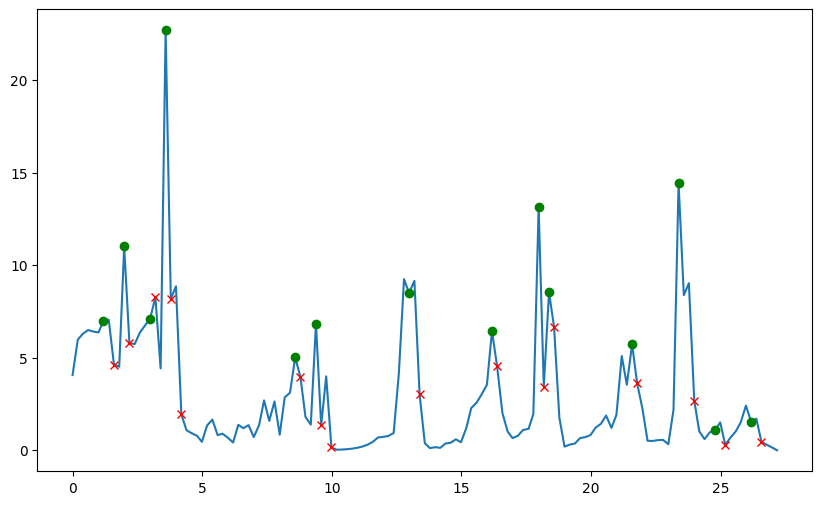

In [ ]:
#zadanie 4
def calc_fall(timeStart, timeEnd):
    print(f"Zakres: {timeStart:.2f} s - {timeEnd:.2f} s")
    time = float(timeEnd) - float(timeStart)
    g = 9.81
    h = (g/2)*(time*time)
    print(f"Wysokość upadku: {h:.2f}[m]")
t, x, y, z = read_sensor_txt("uaccel_upadek_sala")
t = iso_to_seconds(t)

a = []
for i in range(0,len(x)):
    a.append(math.sqrt((x[i]*x[i]) + (y[i]*y[i]) + (z[i]*z[i])))
smoothA = savgol_filter(a, 5, 4)#dane eksperymentalne. 4 stopień powinien dobrze dopasować się do oryginalnego wykresu, delikatnie go odszumiając
a = np.array(a)

gradient = np.gradient(smoothA,t)
#stdev = statistics.stdev(gradient)

for i in range(0,len(gradient)):
    if gradient[i]>-2:#2m/s*s traktuję jako szum
         gradient[i] = 0
end_points, properties = find_peaks(-gradient, distance=2)

start_points = []
for i in range(0,len(gradient)-1):
     if(gradient[i] == 0 and gradient[i+1]<gradient[i]):
          start_points.append(i)

#Moje podejście jest nieidealne. Mimo odszumiania wykrywa dużo małych odbić po ok 20cm (zrzucałem kilkukrotnie z okolic 1 - 1,8 m). Odchylenia mogą wynikać ze sprężystości kurtki na którą zrzucany był telefon
for start in start_points:
    found_impact = False
    for impact in end_points:
        if impact > start:
            t_start = t[start]
            t_impact = t[impact]
            calc_fall(t_start, t_impact)
            found_impact = True
            break

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, a)
plt.plot(t[end_points], a[end_points], "rx")
plt.plot(t[start_points], a[start_points], "go")

def onselect(xmin, xmax):
    calc_fall(xmin,xmax)
span = SpanSelector(
    ax,
    onselect,
    'horizontal',
)

plt.show()

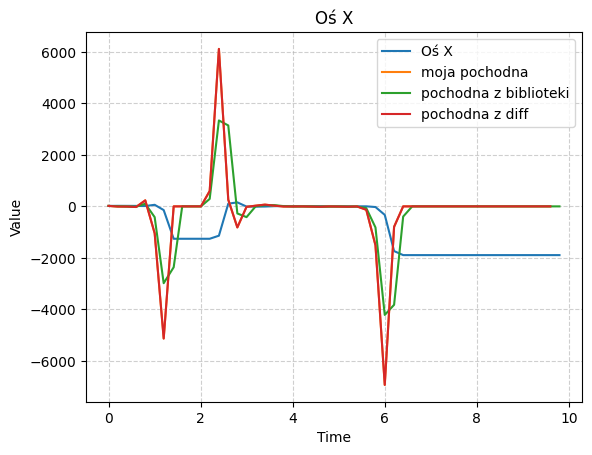

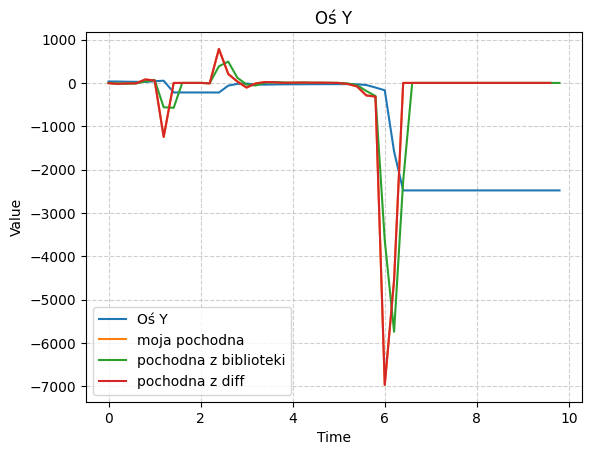

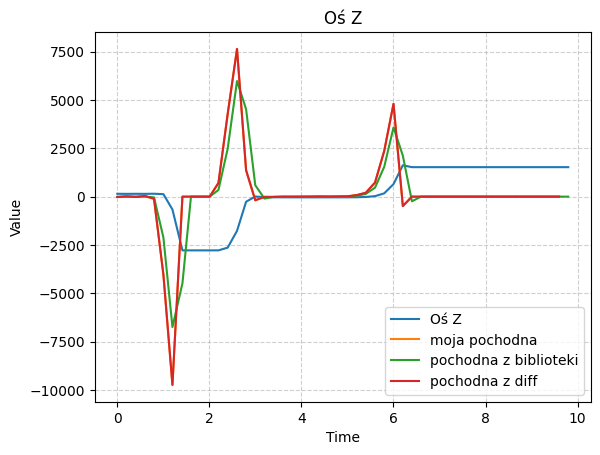

In [69]:
#zadanie 5
def derivative(t,a):
    x = []
    for i in range(0,len(t)-1):
        val = (a[i+1]-a[i])/(t[i+1]-t[i])
        x.append(val)
    
    return x

def draw_plot_z5(t,a,header):
    myVals = derivative(t,a)
    pythonVals = np.gradient(a,t)
    otherMethodVals = np.diff(a)/np.diff(t)

    plt.plot(t, a, label=header)
    plt.plot(t[:-1], myVals, label='moja pochodna')
    plt.plot(t, pythonVals, label='pochodna z biblioteki')
    plt.plot(t[:-1], otherMethodVals, label='pochodna z diff')
    plt.title(header)
    plt.xlabel("Time")
    plt.ylabel("Value")

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
   
t, x, y, z = read_sensor_txt("magnetometer.txt")
t = iso_to_seconds(t)
draw_plot_z5(t,x, "Oś X")
draw_plot_z5(t,y, "Oś Y")
draw_plot_z5(t,z, "Oś Z")

Sygnał jest spokojny, nie ma bardzo stromych zboczy pochodnych. Najbardziej stromy jest wykres osi Y - przyłożyłem mały magnes do ścianki telefonu.
Pochodne sygnałów pomagają w wyszukiwaniu interesujących momentów oznaczających mniej lub bardziej nagłą zmianę sygnału

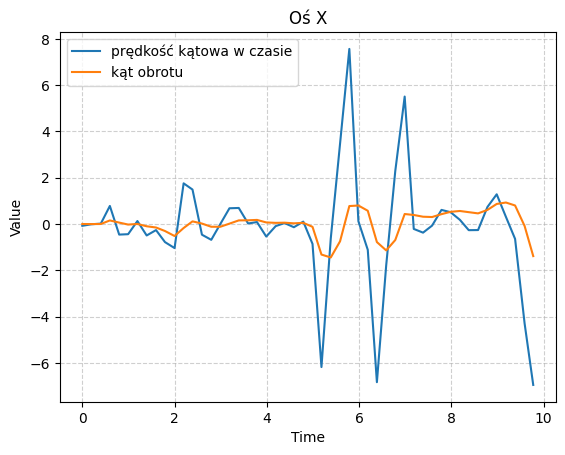

In [70]:
#zadanie 6
def omega(t,a):
    x = [0]
    angle = 0
    for i in range(1,len(t)):
        deltaT = t[i]-t[i-1]
        val = a[i]*deltaT
        angle += val
        prevTimestamp = t[i]
        x.append(angle)
    
    return x
   
t, x, y, z = read_sensor_txt("gyro.txt")
t = iso_to_seconds(t)

plt.plot(t, x, label="prędkość kątowa w czasie")
plt.plot(t, omega(t,x), label="kąt obrotu")

plt.title("Oś X")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

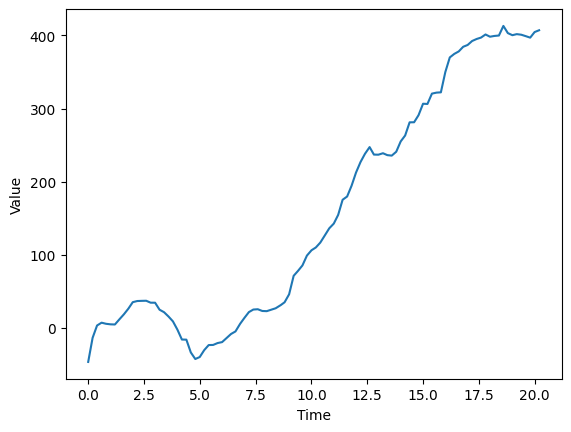

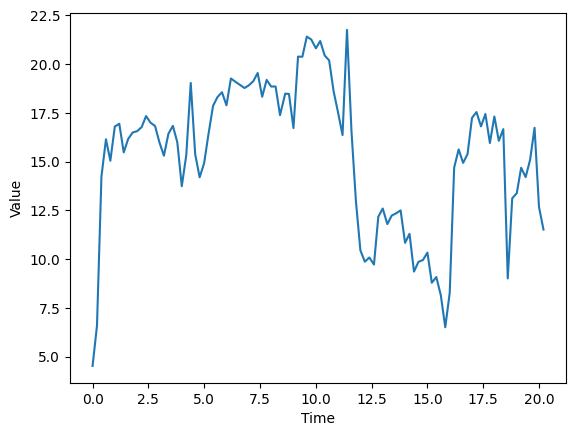

In [71]:
#Zadanie 7
t, x, y, z = read_sensor_txt("magnetometer_kompass")
t = iso_to_seconds(t)
vec = np.sqrt((x*x) + (y*y))
kat_azymut = np.arctan2(y,x)
unwrap = np.unwrap(kat_azymut)
a = np.degrees(unwrap)

plt.plot(t, a)

plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

plt.plot(t, vec)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

Średni czas drgań 1.47s
Teoretyczny czas drgań:1.74, epsilon: 15.30%


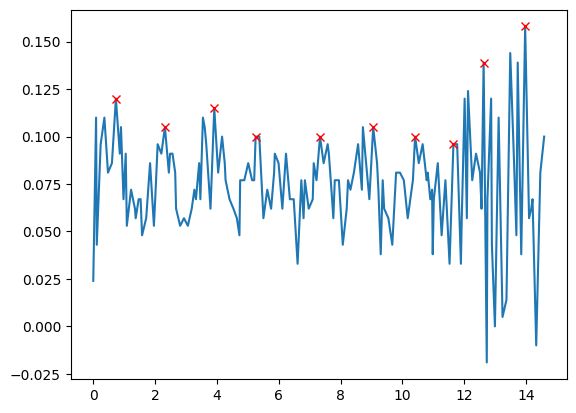

Średni czas drgań 1.69s
Teoretyczny czas drgań:1.74, epsilon: 2.89%


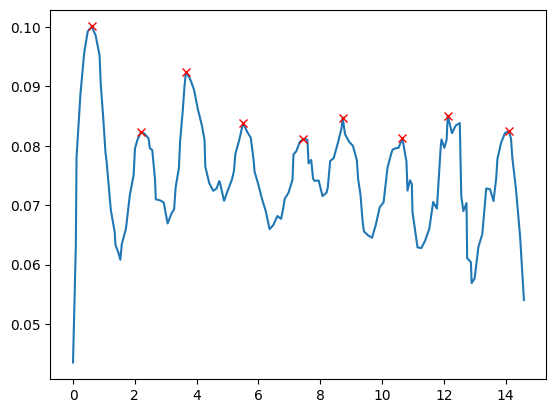

In [72]:
#Zadanie 8
def zadanie(t, vals):
    L = 0.75
    G = 9.81
    Tteor = 2*math.pi*math.sqrt(L/G)
    T = 0
    peaks_indices, properties = find_peaks(vals, distance=10)
    
    for i in range(1,len(peaks_indices)):
        T += t[peaks_indices[i]]-t[peaks_indices[i-1]]
    T /= len(peaks_indices)-1
    epsilon = (abs(T-Tteor)/Tteor)*100

    print(f"Średni czas drgań {T:.2f}s")
    print(f"Teoretyczny czas drgań:{Tteor:.2f}, epsilon: {epsilon:.2f}%")

    plt.plot(t, vals)
    plt.plot(t[peaks_indices], vals[peaks_indices], "rx")
    plt.show()

t, x, y, z = read_sensor_txt("accel_wahadlo2")
t = iso_to_seconds(t)
zadanie(t,x)
zadanie(t,savgol_filter(x,21,3))

Wyniki działania algorytmu są bardzo zbliżone do teorii. Odfiltrowanie szumów zmniejszyło odchylenie epsilon z 15,3% do zaledwie 2,89%.
Szumy powstały tarcie przewodu o kant stołu - drgania były widoczne gołym okiem.